# **IBM Code For Challenge-2020**
### **COVID-19 Detection Model**

**COVID-19** was declared as a Pandemic by WHO on March 11, 2020. This pandemic attacks respiratory system, causes severe illness. There is an ongoing increase in the number of cases day-by-day across the globe. To get protected from COVID wearing masks, maintaining social distance and applying santiziation thoroughly is essential and need to be habituated.

**Problem Statement:**

COVID-19 test kits are in short supply and they cann't be manufactured fast enough, which is a panic cause and there is a need to rely on other diagnosis measures like exploring X-ray images as doctors frequently use X-rays and CT scans to diagnose pneumonia, lung inflammation, abscesses, and/or enlarged lymph nodes. Since COVID-19 attacks the epithelial cells that line our respiratory tract, we can go for X-rays to analyze the health of a patient’s lungs.

And given that nearly all hospitals have X-ray imaging machines, it could be possible to use X-rays to test for COVID-19 without going for dedicated test kits.A drawback is that X-ray analysis requires a radiology expert and takes significant time — which is precious when people are sick around the world. Therefore developing an automated analysis system is required to save medical professionals valuable time.

**Objective:**

Goal of this usecase is to detect COVID-19 on given X-ray images using **Deep Learning**/**Computer Vision**

In [1]:
#os.chdir(PATH)
#!unzip Covid-19-Datset.zip

In [2]:
import pandas as pd 
import tensorflow as tf
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import tqdm
from tqdm import tqdm_notebook
from matplotlib.patches import Rectangle
import seaborn as sns
!pip install pydicom
import pydicom as dcm
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore') 
IS_LOCAL = False
import os
if(IS_LOCAL):
    PATH="/content/drive/My Drive/"
else:
    PATH="/content/drive/My Drive/IBM_CodeForChallenge_2020/Covid-19-Datset/CovidDataset"
print(os.listdir(PATH))

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


['Train', 'Val']


In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest',
    width_shift_range=0.1,
    height_shift_range=0.1
)

test_datagen = ImageDataGenerator(rescale=1./255)

In [4]:
train_data = train_datagen.flow_from_directory(
        '/content/drive/My Drive/IBM_CodeForChallenge_2020/Covid-19-Datset/CovidDataset/Train',  # this is the target directory
        target_size=(224, 224),  # all images will be resized to 224x224
        batch_size=16,
        class_mode='binary')  # since we use binary_crossentropy loss, we need binary labels

Found 224 images belonging to 2 classes.


In [5]:
valid_data = test_datagen.flow_from_directory(
        '/content/drive/My Drive/IBM_CodeForChallenge_2020/Covid-19-Datset/CovidDataset/Val',
        target_size=(224, 224),
        batch_size=16,
        class_mode='binary')

Found 60 images belonging to 2 classes.


In [6]:
img_width = 224
img_height = 224
IMAGE_SIZE=224
kernel =3
num_of_classes =2
BATCH_SIZE = 16
EPOCHS = 4
SHUFFLE_BUFFER_SIZE=1000
input_shape = (img_width, img_height, kernel)

In [7]:
# Building the VGG16 Transfer model
# Importing the Keras libraries and packages
from keras.models import Sequential
from keras import layers
from keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense, Activation,GlobalMaxPooling2D
from keras import applications
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
from keras.applications import VGG16, ResNet50
from keras.models import Model
#Training model
model = Sequential()
model.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(224,224,3)))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1,activation='sigmoid'))

Using TensorFlow backend.


In [8]:
print(model.summary())

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 220, 220, 128)     36992     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 110, 110, 128)     0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 110, 110, 128)     0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 108, 108, 64)      73792     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 54, 54, 64)       

In [9]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [10]:
model.fit(train_data, epochs=20, steps_per_epoch= 10, verbose=1)

Epoch 1/20
10/10 [==============================] - 77s 8s/step - loss: 0.9029 - accuracy: 0.5375
Epoch 2/20
10/10 [==============================] - 75s 7s/step - loss: 0.6885 - accuracy: 0.5188
Epoch 3/20
10/10 [==============================] - 74s 7s/step - loss: 0.6429 - accuracy: 0.6125
Epoch 4/20
10/10 [==============================] - 68s 7s/step - loss: 0.5179 - accuracy: 0.7688
Epoch 5/20
10/10 [==============================] - 75s 7s/step - loss: 0.3625 - accuracy: 0.8813
Epoch 6/20
10/10 [==============================] - 75s 7s/step - loss: 0.3063 - accuracy: 0.8625
Epoch 7/20
10/10 [==============================] - 74s 7s/step - loss: 0.2806 - accuracy: 0.8625
Epoch 8/20
10/10 [==============================] - 72s 7s/step - loss: 0.3680 - accuracy: 0.8562
Epoch 9/20
10/10 [==============================] - 75s 7s/step - loss: 0.2632 - accuracy: 0.8938
Epoch 10/20
10/10 [==============================] - 75s 7s/step - loss: 0.2161 - accuracy: 0.9375
Epoch 11/20
10/10 [

In [11]:
model.evaluate(valid_data, verbose=1)

4/4 [==============================] - 9s 2s/step


[0.11162418872117996, 0.9666666388511658]

In [12]:
model.save_weights('/content/drive/My Drive/IBM_CodeForChallenge_2020/CNN_COVIDDetector_best.h5')

In [13]:
# Testing
import numpy as np
from keras.preprocessing import image

#First learn the classification indices.
print(train_data.class_indices)

{'Covid': 0, 'Normal': 1}


Populating the interactive namespace from numpy and matplotlib


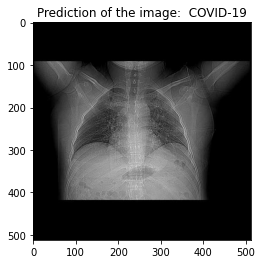

In [14]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img=mpimg.imread('/content/drive/My Drive/IBM_CodeForChallenge_2020/Covid-19-Datset/CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg')
imgplot = plt.imshow(img)

test_image = image.load_img('/content/drive/My Drive/IBM_CodeForChallenge_2020/Covid-19-Datset/CovidDataset/Val/Covid/covid-19-pneumonia-8.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

if result[0][0] == 1:
    prediction = 'NORMAL'
else:
    prediction = 'COVID-19'
    
#print("AI's prediction is: "+ prediction)

plt=plt.title('Prediction of the image:  '+ prediction )
#There we will test this following image, COVID-19 positive

Populating the interactive namespace from numpy and matplotlib


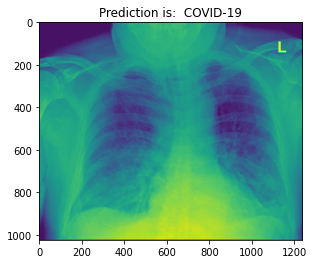

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('/content/drive/My Drive/IBM_CodeForChallenge_2020/Covid-19-Datset/CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

img=mpimg.imread('/content/drive/My Drive/IBM_CodeForChallenge_2020/Covid-19-Datset/CovidDataset/Val/Covid/88de9d8c39e946abd495b37cd07d89e5-6531-0.jpg')
imgplot = plt.imshow(img)

if result[0][0] == 1:
    prediction = 'NORMAL'
else:
    prediction = 'COVID-19'
    
#print("AI's prediction is: "+ prediction)
plt=plt.title('Prediction is:  '+ prediction )

#There we will test this following image, COVID-19 positive

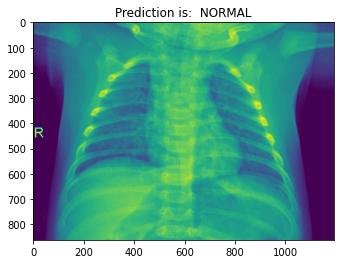

In [16]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

test_image = image.load_img('/content/drive/My Drive/IBM_CodeForChallenge_2020/Covid-19-Datset/CovidDataset/Val/Normal/NORMAL2-IM-0535-0001-0002.jpeg', target_size = (224, 224))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = model.predict(test_image)

img=mpimg.imread('/content/drive/My Drive/IBM_CodeForChallenge_2020/Covid-19-Datset/CovidDataset/Val/Normal/NORMAL2-IM-0535-0001-0002.jpeg')
imgplot = plt.imshow(img)

if result[0][0] == 1:
    prediction = 'NORMAL'
else:
    prediction = 'COVID'
    
plt=plt.title('Prediction is:  '+ prediction )